In [8]:
import scanpy as sc
from GraphST import GraphST
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import umap as umap_ext

import warnings
warnings.filterwarnings('ignore')

# the location of R, which is necessary for mclust algorithm. Please replace it with local R installation path
os.environ['R_HOME'] ='/home/mezallj1/miniconda3/envs/graphst/lib/R'

datadir = '/data1/shahs3/users/mezallj1/data/spectrum'
figdir = '/data1/shahs3/users/mezallj1/figures/spectrum'

In [49]:
adata = sc.read(f'{datadir}/spectrum_after_links.h5ad')

In [51]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000, span=0.5)

In [52]:
features = ['panCK', 'CD8', 'CD68', 'PD1', 'PDL1', 'TOX']
adata = adata[:, features]

In [53]:
# Run device, by default, the package is implemented on 'cpu'. We recommend using GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [55]:
# define model
model = GraphST.GraphST(adata, device=device, random_seed=50)

In [14]:
# train model
adata = model.train()

Begin to train ST data...


100%|██████████| 600/600 [1:03:22<00:00,  6.34s/it]

Optimization finished for ST data!


In [16]:
#adata.write(f'{datadir}/spectrum_graphst.h5ad')
adata = sc.read(f'{datadir}/spectrum_graphst.h5ad')

In [17]:
# set radius to specify the number of neighbors considered during refinement
radius = 50

In [18]:
tool = 'mclust' # mclust, leiden, and louvain

n_clusters=5

# clustering
from GraphST.utils import clustering

clustering(adata, n_clusters, radius=radius, method=tool, n_components=6, refinement=False) # For DLPFC dataset, we use optional refinement step.

fitting ...
  |======================================================================| 100%


In [19]:
adata

AnnData object with n_obs × n_vars = 3332273 × 6
    obs: 'Image', 'spectrum_fov_id', 'spectrum_sample_id', 'tme_inclusion_status', 'cell_type', 'phenotype_full', 'phenotype', 'x0', 'y0', 'patient_id', 'cancer_type', 'tumor_megasite', 'tumor_supersite', 'tumor_site', 'tumor_subsite', 'tumor_type', 'therapy', 'procedure', 'procedure_type', 'wgs_signature', 'scwgs_signature', 'myriad_signature', 'impact_signature', 'impact_gene_signature', 'consensus_signature', 'consensus_signature_short', 'BRCA_gene_status', 'BRCA_mutation_status', 'BRCA_gene_mutation_status', 'all_total', 'all_arm', 'all_chrom', 'all_total_gain', 'all_arm_gain', 'all_chrom_gain', 'all_total_loss', 'all_arm_loss', 'all_chrom_loss', 'internal_total', 'internal_arm', 'internal_chrom', 'internal_total_gain', 'internal_arm_gain', 'internal_chrom_gain', 'internal_total_loss', 'internal_arm_loss', 'internal_chrom_loss', 'terminal_total', 'terminal_arm', 'terminal_chrom', 'terminal_total_gain', 'terminal_arm_gain', 'terminal_

In [20]:
adata.write(f'{datadir}/spectrum_graphst_5.h5ad')
#adata = sc.read(f'{datadir}/spectrum_graphst_10.h5ad')

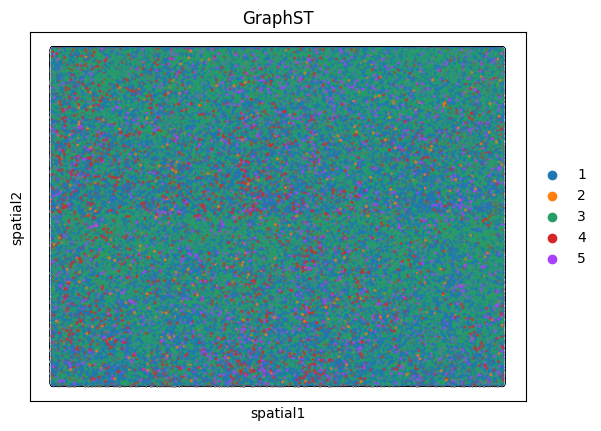

<Figure size 640x480 with 0 Axes>

In [21]:
sc.pl.embedding(adata, basis='spatial', title = 'GraphST', color='domain', s=20, add_outline=True)
plt.savefig(f'{figdir}/spectrum_graphst_spatial_5.png', bbox_inches="tight")

In [22]:
def umap(adata, encoding_key="X_grafiti",n_neighbors=20,max_iter=100, min_dist=0.5, metric="euclidean", scanpy=False, neighbors_key="grafiti_neighbors", embd_name="X_umap"):
    if not scanpy:
        ldm = umap_ext.UMAP(n_epochs=max_iter,
                        n_neighbors=n_neighbors,
                        min_dist=min_dist,
                        metric=metric)
        embd = ldm.fit_transform(adata.obsm[encoding_key])
        adata.obsm[embd_name] = embd
    else:
        sc.tl.umap(adata,neighbors_key=neighbors_key)

In [23]:
umap(adata, encoding_key="emb")

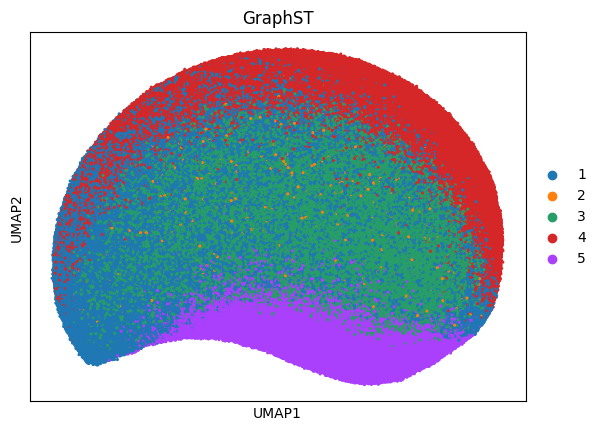

<Figure size 640x480 with 0 Axes>

In [24]:
sc.pl.umap(adata,title="GraphST",color=["domain"],s=20)
plt.savefig(f'{figdir}/spectrum_graphst_umap_5.png', bbox_inches="tight")

In [25]:
adata.write(f'{datadir}/spectrum_graphst_5.h5ad')
#adata = sc.read(f'{datadir}/spectrum_graphst.h5ad')

In [26]:
print('a')

a
